In [2]:
import pandas as pd

df = pd.read_excel('Vendas.xlsx')

In [3]:
df.head(5)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71


In [4]:
# Faturamento por loja
faturamento_por_loja = df.groupby('ID Loja')['Valor Final'].sum().reset_index()
faturamento_por_loja = faturamento_por_loja.rename(columns={'Valor Final': 'Faturamento por loja'})
print(faturamento_por_loja)

                             ID Loja  Faturamento por loja
0                Bourbon Shopping SP               1726110
1         Center Shopping Uberlândia               1668921
2                  Iguatemi Campinas               1762419
3                 Iguatemi Esplanada               1699681
4                     Norte Shopping               1711968
5       Novo Shopping Ribeirão Preto               1678225
6        Palladium Shopping Curitiba               1721120
7          Parque Dom Pedro Shopping               1631630
8          Passei das Águas Shopping               1649014
9                  Ribeirão Shopping               1707122
10                    Rio Mar Recife               1722766
11        Rio Mar Shopping Fortaleza               1698430
12                 Salvador Shopping               1646739
13                    Shopping Barra               1653103
14        Shopping Center Interlagos               1640486
15  Shopping Center Leste Aricanduva               16828

In [8]:
import matplotlib.pyplot as plt

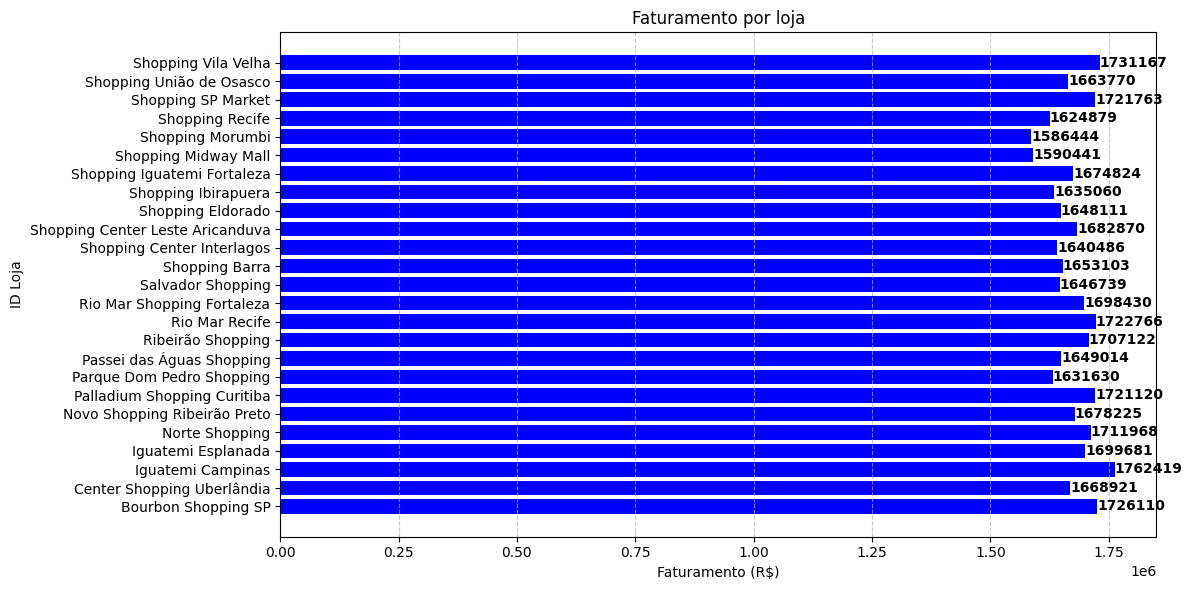

In [9]:
## Criar uma figura 
plt.figure(figsize=(12, 6))

### Gráfico de barras na horizontal
plt.barh(faturamento_por_loja['ID Loja'], faturamento_por_loja['Faturamento por loja'], color='blue')

#### Definir a posição e o rótulo de cada barra no eixo y
plt.yticks(faturamento_por_loja['ID Loja'])

##### Adicionar o valor da quantidade como um rótulo no final de cada barra
for i, v in enumerate(faturamento_por_loja['Faturamento por loja']):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

###### Adicionar um título ao gráfico e aos eixos x e y
plt.title('Faturamento por loja')
plt.xlabel('Faturamento (R$)')
plt.ylabel('ID Loja')

####### Adicionar linhas de grade no eixo x com estilo tracejado e transparência de 70%
plt.grid(axis='x', linestyle='--', alpha=0.7)

######## Ajustar automaticamente o espaçamento entre os elementos do gráfico para evitar sobreposições
plt.tight_layout()

######## Exibir o gráfico na tela
plt.show()

In [ ]:
quantidade_por_loja = df.groupby('ID Loja')['Quantidade'].sum().reset_index()
print(quantidade_por_loja)

                             ID Loja  Quantidade
0                Bourbon Shopping SP        8863
1         Center Shopping Uberlândia        8627
2                  Iguatemi Campinas        8935
3                 Iguatemi Esplanada        8580
4                     Norte Shopping        9014
5       Novo Shopping Ribeirão Preto        8751
6        Palladium Shopping Curitiba        9091
7          Parque Dom Pedro Shopping        8388
8          Passei das Águas Shopping        8618
9                  Ribeirão Shopping        8825
10                    Rio Mar Recife        8863
11        Rio Mar Shopping Fortaleza        8937
12                 Salvador Shopping        8698
13                    Shopping Barra        8638
14        Shopping Center Interlagos        8675
15  Shopping Center Leste Aricanduva        8938
16                 Shopping Eldorado        8719
17               Shopping Ibirapuera        8723
18       Shopping Iguatemi Fortaleza        8629
19              Shop

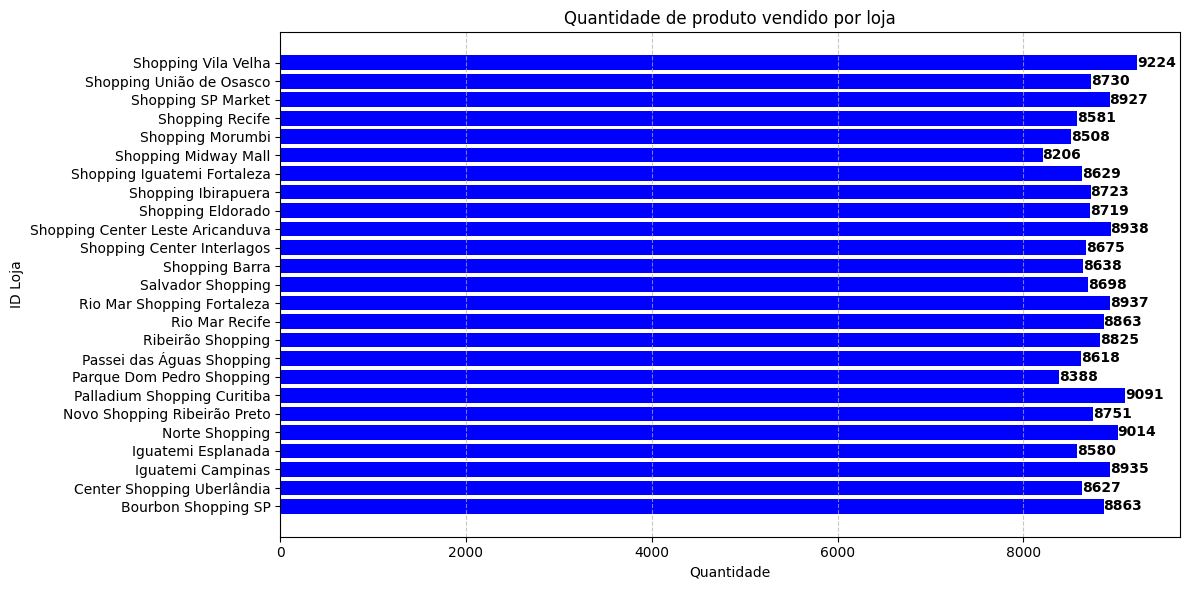

In [ ]:
## Criar uma figura 
plt.figure(figsize=(12, 6))

#### Gráfico de barras na horizontal
plt.barh(quantidade_por_loja['ID Loja'], quantidade_por_loja['Quantidade'], color='blue')

#### Definir a posição e o rótulo de cada barra no eixo y
plt.yticks(quantidade_por_loja['ID Loja'])

##### Adicionar o valor da quantidade como um rótulo no final de cada barra
for i, v in enumerate(quantidade_por_loja['Quantidade']):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

###### Adicionar um título ao gráfico e aos eixos x e y
plt.title('Quantidade de produto vendido por loja')
plt.xlabel('Quantidade')
plt.ylabel('ID Loja')

####### Adicionar linhas de grade no eixo x com estilo tracejado e transparência de 70%
plt.grid(axis='x', linestyle='--', alpha=0.7)

######## Ajustar automaticamente o espaçamento entre os elementos do gráfico para evitar sobreposições
plt.tight_layout()

######### Exibir o gráfico na tela
plt.show()

In [ ]:
faturamento_total = df['Valor Final'].sum()
quantidade_total = df['Quantidade'].sum()
ticket_medio = faturamento_total / quantidade_total
print('Ticket médio: R$ {:.2f}'.format(ticket_medio))

Ticket médio: R$ 191.49


In [ ]:
# Agrupar os dados por "ID Loja" e calcular o faturamento total e a quantidade total de produtos vendidos para cada loja
faturamento_por_loja = df.groupby('ID Loja')['Valor Final'].sum().reset_index()
quantidade_por_loja = df.groupby('ID Loja')['Quantidade'].sum().reset_index()

## Juntar os DataFrames "faturamento_por_loja" e "quantidade_por_loja" em um único DataFrame
ticket_medio_por_loja = pd.merge(faturamento_por_loja, quantidade_por_loja, on='ID Loja')

### Calcular o ticket médio para cada loja
ticket_medio_por_loja['Ticket Médio'] = ticket_medio_por_loja['Valor Final'] / ticket_medio_por_loja['Quantidade']

#### Imprimir apenas a coluna "ID Loja" e "Ticket Médio"
print(ticket_medio_por_loja.loc[:, ['ID Loja', 'Ticket Médio']])

                             ID Loja  Ticket Médio
0                Bourbon Shopping SP    194.754598
1         Center Shopping Uberlândia    193.453228
2                  Iguatemi Campinas    197.248909
3                 Iguatemi Esplanada    198.098019
4                     Norte Shopping    189.923231
5       Novo Shopping Ribeirão Preto    191.775226
6        Palladium Shopping Curitiba    189.321307
7          Parque Dom Pedro Shopping    194.519552
8          Passei das Águas Shopping    191.345324
9                  Ribeirão Shopping    193.441586
10                    Rio Mar Recife    194.377299
11        Rio Mar Shopping Fortaleza    190.044758
12                 Salvador Shopping    189.323868
13                    Shopping Barra    191.375666
14        Shopping Center Interlagos    189.105014
15  Shopping Center Leste Aricanduva    188.282614
16                 Shopping Eldorado    189.025232
17               Shopping Ibirapuera    187.442394
18       Shopping Iguatemi Fort

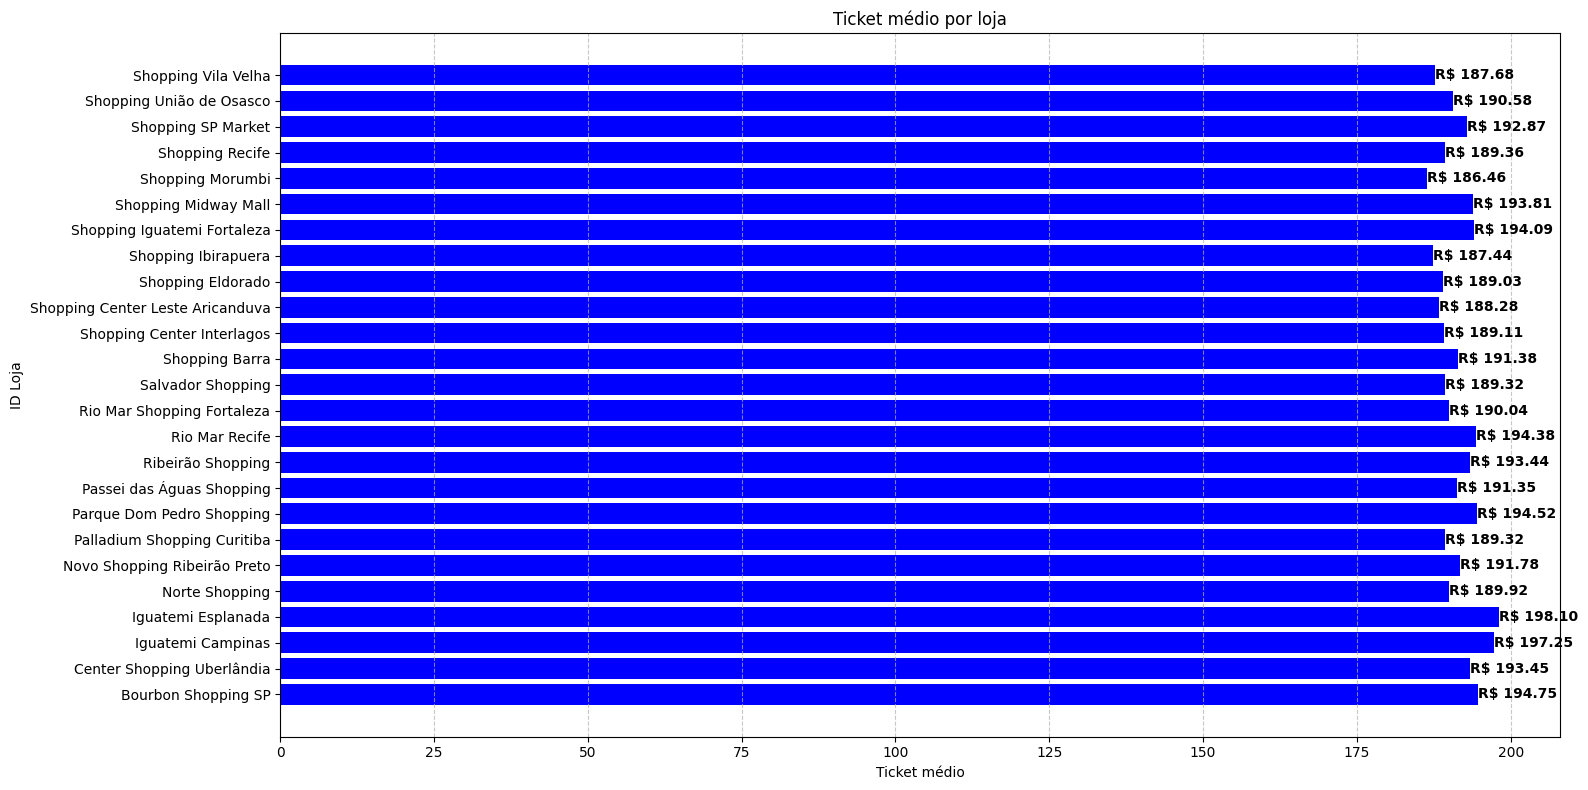

In [ ]:
# Criar uma figura com um tamanho personalizado
plt.figure(figsize=(16, 8))

## Criar um gráfico de barras na horizontal
plt.barh(ticket_medio_por_loja['ID Loja'], ticket_medio_por_loja['Ticket Médio'], color='blue')

### Definir a posição e o rótulo de cada barra no eixo y
plt.yticks(ticket_medio_por_loja['ID Loja'])

#### Adicionar o valor do ticket médio como um rótulo no final de cada barra
for i, v in enumerate(ticket_medio_por_loja['Ticket Médio']):
    plt.text(v, i, 'R$ {:.2f}'.format(v), color='black', fontweight='bold', ha='left', va='center')

##### Adicionar um título ao gráfico e aos eixos x e y
plt.title('Ticket médio por loja')
plt.xlabel('Ticket médio')
plt.ylabel('ID Loja')

##### Adicionar linhas de grade no eixo x com estilo tracejado e transparência de 70%
plt.grid(axis='x', linestyle='--', alpha=0.7)

###### Ajustar automaticamente o espaçamento entre os elementos do gráfico para evitar sobreposições
plt.tight_layout()

####### Exibir o gráfico na tela
plt.show()